# **INTRODUCTION**

The objective of this project is to build a robust machine learning model to predict loan approval outcomes (loan_status) based on customer attributes such as income, education, home ownership, and previous loan defaults. Accurate prediction of loan approvals can streamline the decision-making process for financial institutions and improve customer satisfaction while minimizing risks.

# **Tools and Libraries**

**Programming Language**: Python




**Libraries**: pandas, numpy, matplotlib, seaborn, scikit-learn, imbalanced-learn, xgboost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# **Data description**


This dataset is suitable for loan approval modeling, where the goal could be to predict loan_status based on the other features. Analyses could involve understanding the influence of factors such as credit score, income, or loan intent on loan approval.

In [ ]:
df = pd.read_csv("/content/loan_data.csv") # Replace read_data with read_csv to read data from a CSV file.

In [ ]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


# **basic understand data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [ ]:
df.dtypes

,0
person_age,float64
person_gender,object
person_education,object
person_income,float64
person_emp_exp,int64
person_home_ownership,object
loan_amnt,float64
loan_intent,object
loan_int_rate,float64
loan_percent_income,float64


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [ ]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [ ]:
df.shape

(70000, 7)

# **5. Visualizations**
**Correlation Heatmap**: Showcased the relationship between features and the target variable.


**Class Distribution**: Count plots before and after oversampling displayed class balancing.


**Feature Distributions**: Histograms and boxplots visualized feature distributions and identified outliers.

In [ ]:
print(df['loan_status'].unique())

[1 0]


<Axes: xlabel='count', ylabel='loan_status'>

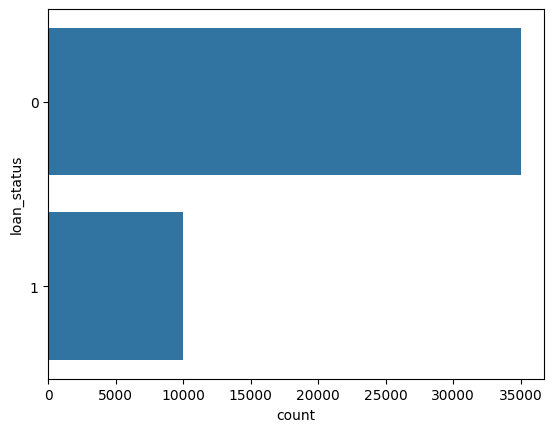

In [ ]:
sns.countplot(y="loan_status",data=df)

array([[<Axes: title={'center': 'person_age'}>,
        <Axes: title={'center': 'person_income'}>,
        <Axes: title={'center': 'person_emp_exp'}>],
       [<Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'loan_int_rate'}>,
        <Axes: title={'center': 'loan_percent_income'}>],
       [<Axes: title={'center': 'cb_person_cred_hist_length'}>,
        <Axes: title={'center': 'credit_score'}>,
        <Axes: title={'center': 'loan_status'}>]], dtype=object)

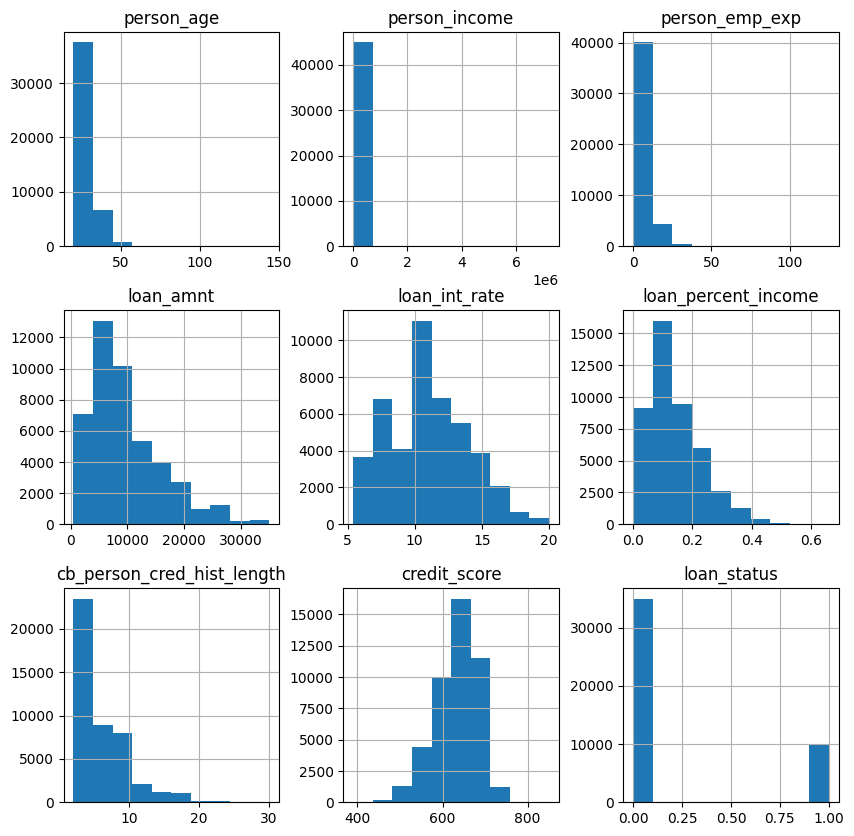

In [ ]:
df.hist(figsize=(10,10))

In [ ]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [ ]:
print(df['person_education'].unique())

['Master' 'High School' 'Bachelor' 'Associate' 'Doctorate']


In [ ]:
print(df['person_home_ownership'].unique())

['RENT' 'OWN' 'MORTGAGE' 'OTHER']


In [ ]:
print(df['loan_intent'].unique())

['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']


# **DATA CLEANING and PREPARATION**

In [ ]:
# Mapping ordinal values to numbers
ordinal_mapping = {'High School': 1, 'Master': 2, 'Bachelor': 3,'Associate':4,'Doctorate':5}
df['person_education'] = df['person_education'].map(ordinal_mapping)

ordinal_mapping ={'RENT':1,'MORTGAGE':2,'OWN':3,'OTHER':4}
df['person_home_ownership'] = df['person_home_ownership'].map(ordinal_mapping)

ordinal_mapping={'PERSONAL':1,'EDUCATION':2,'MEDICAL':3,'VENTURE':4,'HOMEIMPROVEMENT':5,'DEBTCONSOLIDATION':6}
df['loan_intent'] = df['loan_intent'].map(ordinal_mapping)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the encoder to the 'loan_status' column and transform it
df['person_gender'] = le.fit_transform(df['person_gender'])
df['previous_loan_defaults_on_file'] = le.fit_transform(df['previous_loan_defaults_on_file'])

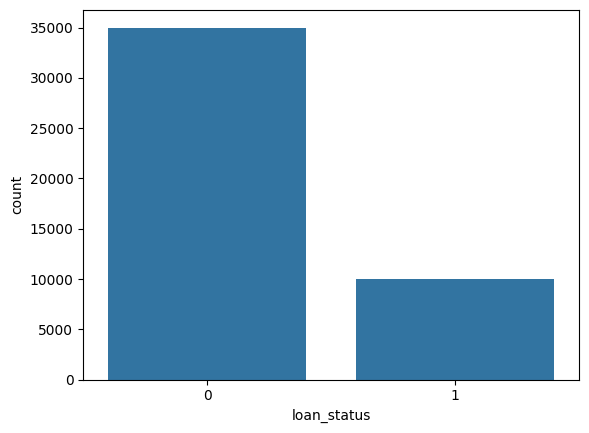

In [ ]:
sns.countplot(x='loan_status', data=df)
plt.show() # Display the plot

# **Mapping ordinal**

In [ ]:
!pip install imblearn # install imblearn
from imblearn.over_sampling import RandomOverSampler, SMOTE # import with correct module name

In [ ]:
#assuming 'df' is your DataFrame with 'loan_status' as the target variable
x=df.drop('loan_status',axis=1)#Features
y=df['loan_status']#Target


#screatan oversampler object (choose either randomoversampler or SMOTE)
#Uncomment the one you want to use
#ros=randomOversampler() for random Oversampling
ros=SMOTE()#for sythetic minority

#Apply the oversampler to the data
x_resampled,y_resampled=ros.fit_resample(x,y)

x_resampled=pd.DataFrame(x_resampled,columns=x.columns)
y_resampled=pd.Series(y_resampled,name='loan_status')

df=pd.concat([x_resampled,y_resampled],axis=1)


In [ ]:
df["loan_status"].value_counts()

,count
loan_status,
1,35000
0,35000


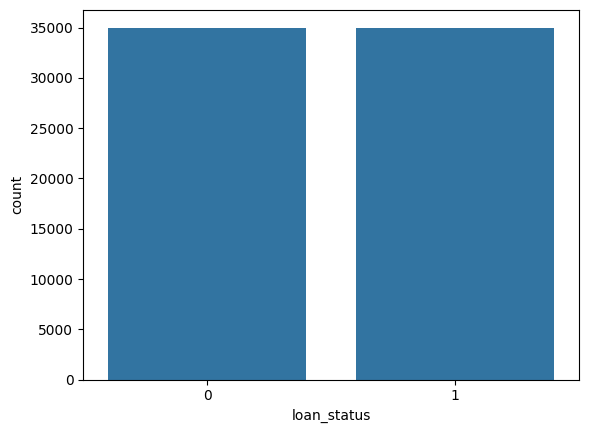

In [ ]:
sns.countplot(x='loan_status', data=df)
plt.show() # Display the plot

In [ ]:
 df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.000000,0,2,71948.000000,0,1,35000.000000,1,16.020000,0.49,3.000000,561,0,1
1,21.000000,0,1,12282.000000,0,3,1000.000000,2,11.140000,0.08,2.000000,504,1,0
2,25.000000,0,1,12438.000000,3,2,5500.000000,3,12.870000,0.44,3.000000,635,0,1
3,23.000000,0,3,79753.000000,0,1,35000.000000,3,15.230000,0.44,2.000000,675,0,1
4,24.000000,1,2,66135.000000,1,1,35000.000000,3,14.270000,0.53,4.000000,586,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,35.197008,0,3,37217.531181,13,1,10105.191970,3,11.077430,0.27,11.394016,571,0,1
69996,28.000000,1,2,67986.212198,6,1,20000.000000,3,18.250000,0.29,7.447674,633,0,1
69997,33.398001,0,3,124331.641797,8,1,25000.000000,3,13.904723,0.20,11.530668,603,0,1
69998,22.740583,1,2,24425.288548,1,1,7766.292817,3,14.578202,0.32,4.000000,663,0,1


# **CORRELATION ANALYSIS**

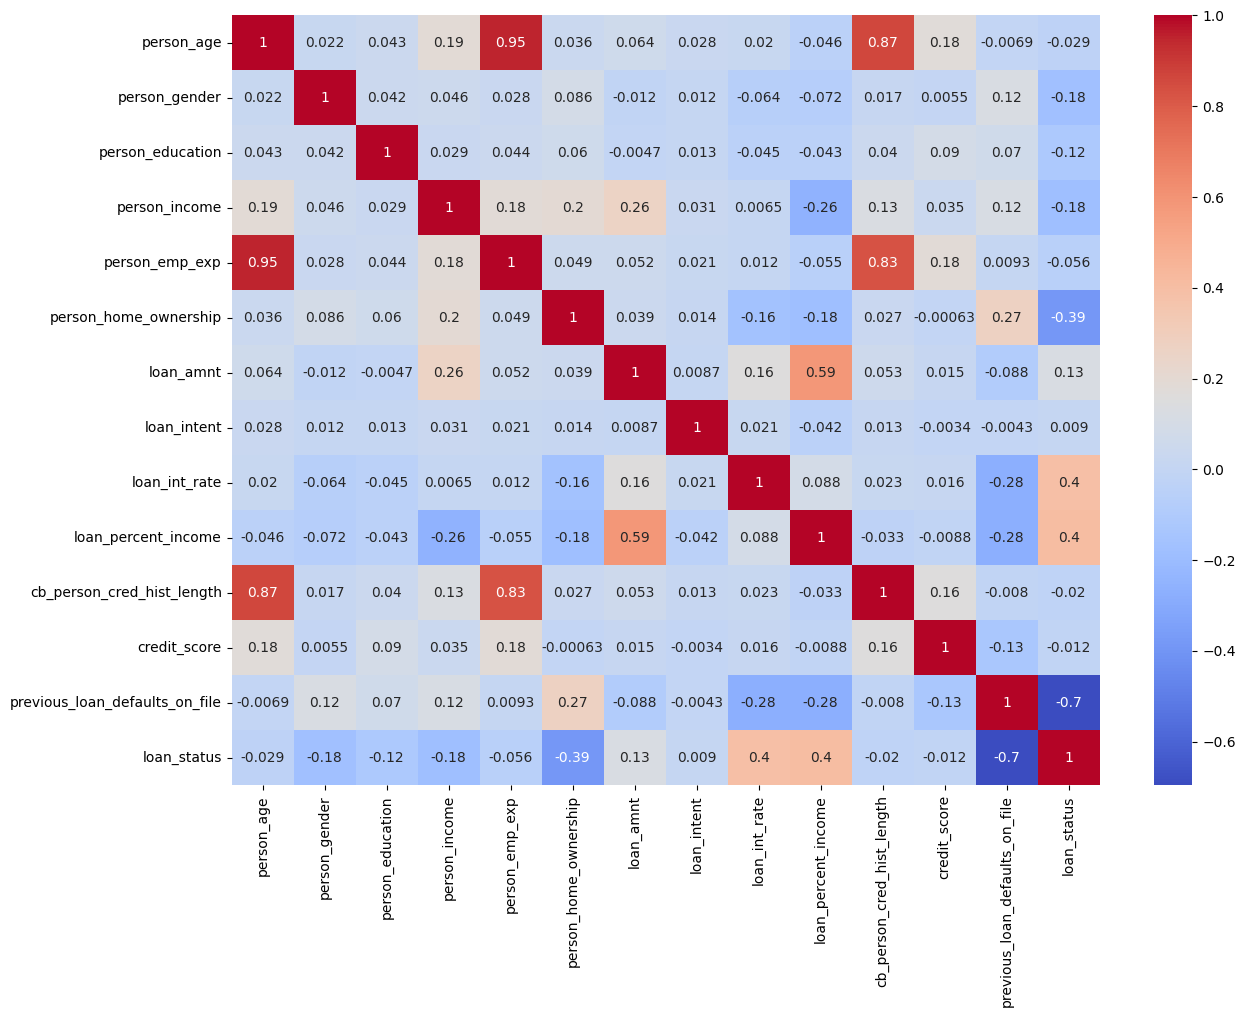

In [ ]:
corr_matrix=df.corr()
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.show()

In [ ]:
cor=df.corr()['loan_status'].sort_values(ascending=False)
cor

,loan_status
loan_status,1.000000
loan_percent_income,0.404618
loan_int_rate,0.395789
loan_amnt,0.125199
loan_intent,0.009014
credit_score,-0.011943
cb_person_cred_hist_length,-0.020449
person_age,-0.029458
person_emp_exp,-0.055814
person_education,-0.117130


In [ ]:
df.drop(['loan_intent'],axis=1,inplace=True)
df.drop(['credit_score'],axis=1,inplace=True)
df.drop(['cb_person_cred_hist_length'],axis=1,inplace=True)
df.drop(['person_age'],axis=1,inplace=True)
df.drop(['person_emp_exp'],axis=1,inplace=True)
df.drop(['person_education'],axis=1,inplace=True)
df.drop(['person_gender'],axis=1,inplace=True)

In [ ]:
df

,person_income,person_home_ownership,loan_amnt,loan_int_rate,loan_percent_income,previous_loan_defaults_on_file,loan_status
0,71948.000000,1,35000.000000,16.020000,0.49,0,1
1,12282.000000,3,1000.000000,11.140000,0.08,1,0
2,12438.000000,2,5500.000000,12.870000,0.44,0,1
3,79753.000000,1,35000.000000,15.230000,0.44,0,1
4,66135.000000,1,35000.000000,14.270000,0.53,0,1
...,...,...,...,...,...,...,...
69995,37217.531181,1,10105.191970,11.077430,0.27,0,1
69996,67986.212198,1,20000.000000,18.250000,0.29,0,1
69997,124331.641797,1,25000.000000,13.904723,0.20,0,1
69998,24425.288548,1,7766.292817,14.578202,0.32,0,1


# **OUTLIER HANDLING**

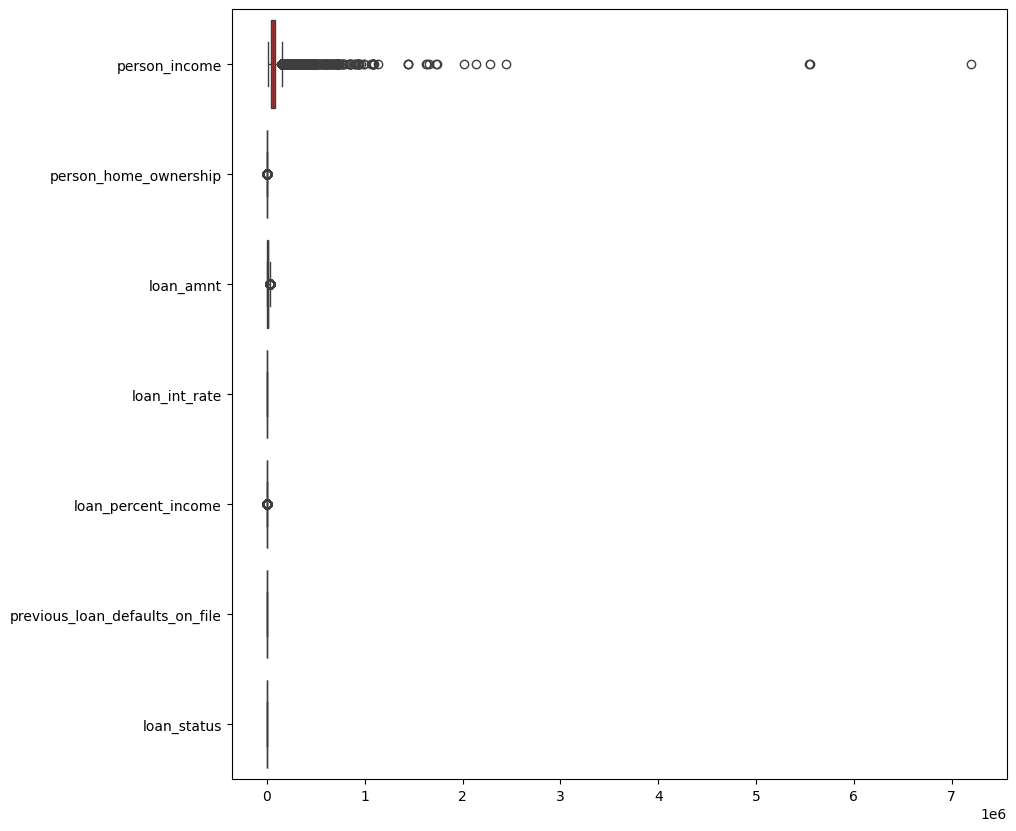

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(df,orient='h',palette='Set1')
plt.show()

In [ ]:
Q1=np.quantile(df,0.25)
Q2=np.quantile(df,0.50)
Q3=np.quantile(df,0.75)
Q1,Q2,Q3
IQR=Q3-Q1
IQR


4999.84

In [ ]:
def remove_outliers_iqr(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for the column
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for detecting outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out the outliers from the DataFrame
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered


df_no_outliers = remove_outliers_iqr(df,'person_income')

# **SKEWNESS HANDLING**

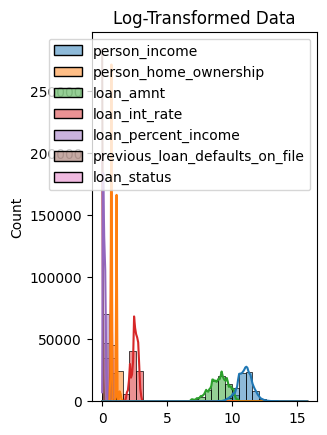

<Figure size 5000x1500 with 0 Axes>

<Figure size 5000x1500 with 0 Axes>

In [ ]:
#To handle skewness
import numpy as np
log_data = np.log(df + 1)  # Adding 1 to avoid log(0)

# Plotting log-transformed data distribution
plt.subplot(1,2,2)
sns.histplot(log_data, bins=30, kde=True)
plt.title("Log-Transformed Data")
plt.show()

# Assuming log_data is a DataFrame with multiple features
num_features = log_data.shape[1]  # Number of features
plt.figure(figsize=(50, 15))  # Adjust the figure size as needed

# for i, column in enumerate(log_data.columns, 1):
#     plt.subplot(1, num_features, i)  # Adjust layout for each feature
#     sns.histplot(log_data[column], bins=30, kde=True)
#     plt.title(f"Log-Transformed {column}")

# plt.tight_layout()
# plt.show()

In [ ]:
df.shape

(70000, 7)

# **Model Training and Evaluation**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df.columns

Index(['person_income', 'person_home_ownership', 'loan_amnt', 'loan_int_rate',
       'loan_percent_income', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [ ]:
independet_feature = ['person_income', 'person_home_ownership', 'loan_amnt', 'loan_int_rate',
       'loan_percent_income', 'previous_loan_defaults_on_file']
dependet_feature = ['loan_status']
x = df[independet_feature]
y = df[dependet_feature]

In [ ]:
from sklearn.preprocessing import StandardScaler # Import StandardScaler
# Create and fit the scaler
scaler = StandardScaler()
scaler.fit(x)

# Transform the data
X_scaled = scaler.transform(x)
# X_test_scaled = scaler.transform(X_test)

In [ ]:
# Assuming you have your features in 'X' and target variable in 'y'

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import confusion_matrix

# **GradientBoostingClassifier**

In [ ]:
from sklearn.ensemble import  GradientBoostingClassifier

In [ ]:
# Create a GradientBoostingClassifiert Classifier object
model_1 = GradientBoostingClassifier()  # You can adjust hyperparameters

# Train the model
model_1.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model_1.predict(x_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
cm

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9006428571428572


array([[6151,  872],
       [ 519, 6458]])

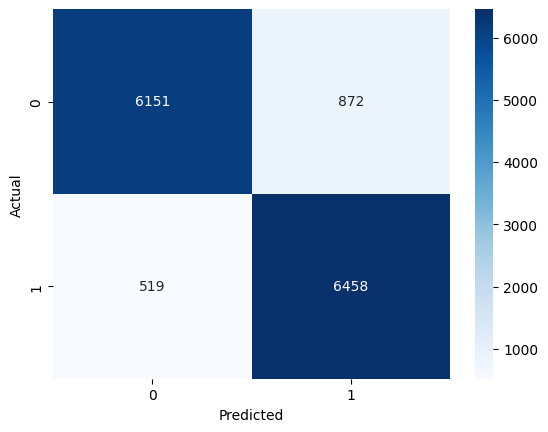

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
conf_matrix=np.array([[6151,872],
                      [519,6458]])
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **xgboost**

In [ ]:
!pip install xgboost

In [ ]:

import xgboost as xgb

# Create an XGBoost Classifier object
model_2 = xgb.XGBClassifier()  # You can adjust hyperparameters

# Train the model
model_2.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model_2.predict(x_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
cm

Accuracy: 0.9306428571428571


array([[6409,  614],
       [ 357, 6620]])

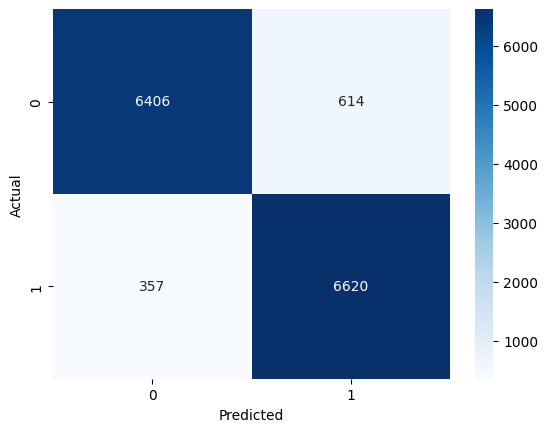

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
conf_matrix=np.array([[6406,614],
                      [357,6620]])
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **RandomForestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Create an RandomForestClassifier Classifier object
model_3 = RandomForestClassifier()  # You can adjust hyperparameters

# Train the model
model_3.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model_3.predict(x_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
cm

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.9338571428571428


array([[6456,  567],
       [ 359, 6618]])

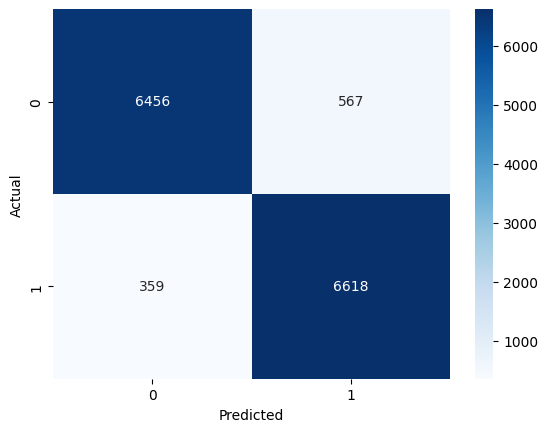

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
conf_matrix=np.array([[6456,567],
                      [359,6618]])
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **LogisticRegression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Create an LogisticRegression Classifier object
model_4 =LogisticRegression()  # You can adjust hyperparameters

# Train the model
model_4.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model_4.predict(x_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
cm

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.8817857142857143


array([[5903, 1120],
       [ 535, 6442]])

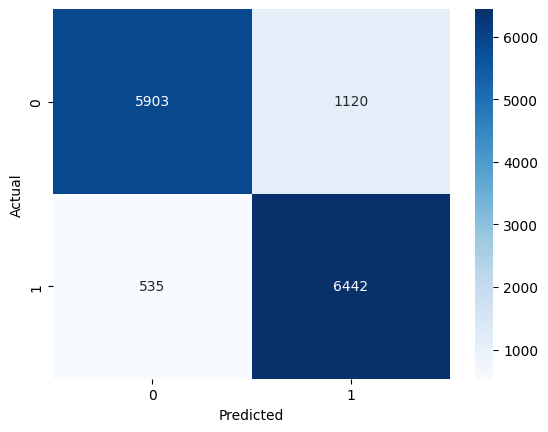

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
conf_matrix=np.array([[5903,1120],
                      [535,6442]])
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **KNeighborsClassifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Create an KNeighborsClassifier Classifier object
model_5 =KNeighborsClassifier()  # You can adjust hyperparameters

# Train the model
model_5.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model_5.predict(x_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
cm

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.9017142857142857


array([[6152,  871],
       [ 505, 6472]])

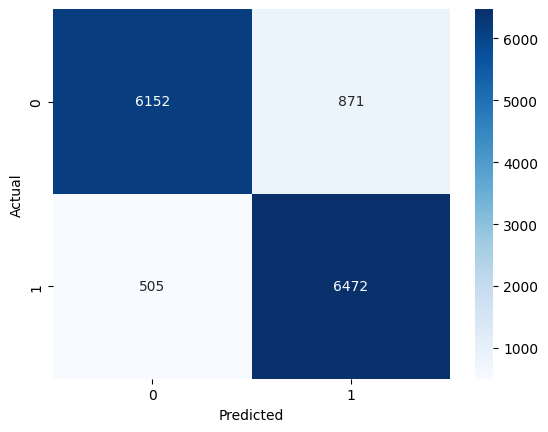

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
conf_matrix=np.array([[6152,871],
                      [505,6472]])
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **summarizing the algorithms**

**.**This shows the proportion of correct predictions among all predictions. Random Forest and XGBoost achieve the highest scores, reflecting their strong capabilities in handling complex datasets.




**.** Gradient Boosting and XGBoost are ensemble methods that use boosting to sequentially improve model performance. Gradient Boosting is effective in handling complex patterns but can be computationally intensive, while XGBoost enhances this approach with regularization and optimization, often achieving superior results. Random Forest, another ensemble method, builds independent decision trees and is robust against overfitting, making it suitable for diverse datasets. Logistic Regression is a simple and interpretable linear model, best for linearly separable data but limited in handling non-linear relationships. K-Nearest Neighbors (KNN) relies on proximity for classification and is intuitive, though it can be computationally expensive for large datasets and is sensitive to feature scaling. The choice of algorithm depends on the dataset's complexity, size, and the need for interpretability versus predictive accuracy. Overall, tree-based methods like XGBoost and Random Forest often excel in handling real-world datasets with complex patterns.

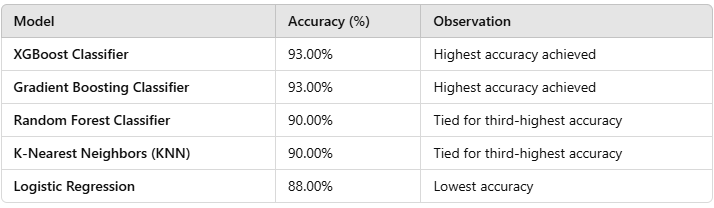